# Read data into pandas

In [3]:
import pandas as pd
import os

In [4]:
data_path = 'data/'
raw_data = pd.read_csv(os.path.join(data_path, '25AprilSurveyAnswers(1-278).csv'))
raw_data = raw_data.drop(columns=['Email', 'Name'])

In [5]:
health = 'Healthcare'
highstakes = 'Highstake'
ai = 'AI Experience'
dr = 'Doctor'
dr_gb = 'Doctor and Glass-Box'
dr_bb = 'Doctor and Black-Box'
bb = 'Black-Box'
bins = ['low','medium','high']

raw_data.columns.values[3] = health
raw_data.columns.values[4] = highstakes
raw_data.columns.values[5] = ai
raw_data.columns.values[6] = dr
raw_data.columns.values[7] = dr_gb
raw_data.columns.values[8] = dr_bb
raw_data.columns.values[9] = bb
raw_data

,ID,Start time,Completion time,Healthcare,Highstake,AI Experience,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
0,9,3/14/22 12:59:04,3/14/22 13:01:26,No,7,2,10,10,7,5
1,10,3/14/22 13:02:18,3/14/22 13:03:56,No,2,1,9,10,9,7
2,11,3/14/22 13:01:56,3/14/22 13:05:26,No,6,6,8,7,8,9
3,12,3/14/22 13:08:48,3/14/22 13:10:34,Yes,9,2,8,4,2,1
4,13,3/14/22 13:10:14,3/14/22 13:15:56,No,5,7,7,8,5,1
...,...,...,...,...,...,...,...,...,...,...
273,282,4/4/22 10:35:25,4/4/22 10:45:33,Yes,5,1,8,8,9,1
274,283,4/4/22 13:27:33,4/4/22 13:30:57,Yes,8,1,9,10,9,9
275,284,4/5/22 16:17:35,4/5/22 16:21:40,Yes,5,1,8,9,8,9
276,285,4/5/22 16:20:16,4/5/22 16:24:18,No,7,4,7,8,6,6


# Trust distribution

In [6]:
# binning ai experience into 3 bins:
# Categories (3, interval[float64, right]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]
ai_binned = 'AI Experience'
raw_data[ai_binned] = pd.cut(x=raw_data[ai], bins=3, labels=bins)
raw_data

,ID,Start time,Completion time,Healthcare,Highstake,AI Experience,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
0,9,3/14/22 12:59:04,3/14/22 13:01:26,No,7,low,10,10,7,5
1,10,3/14/22 13:02:18,3/14/22 13:03:56,No,2,low,9,10,9,7
2,11,3/14/22 13:01:56,3/14/22 13:05:26,No,6,medium,8,7,8,9
3,12,3/14/22 13:08:48,3/14/22 13:10:34,Yes,9,low,8,4,2,1
4,13,3/14/22 13:10:14,3/14/22 13:15:56,No,5,medium,7,8,5,1
...,...,...,...,...,...,...,...,...,...,...
273,282,4/4/22 10:35:25,4/4/22 10:45:33,Yes,5,low,8,8,9,1
274,283,4/4/22 13:27:33,4/4/22 13:30:57,Yes,8,low,9,10,9,9
275,284,4/5/22 16:17:35,4/5/22 16:21:40,Yes,5,low,8,9,8,9
276,285,4/5/22 16:20:16,4/5/22 16:24:18,No,7,low,7,8,6,6


In [8]:
# Highstakes binned
# binning highstakes experience into 3 bins:
# Categories (3, interval[float64, right]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]
highstakes_binned = 'high-stakes decisions'
raw_data[highstakes_binned] = pd.cut(x=raw_data[highstakes], bins=3, labels=bins)
raw_data

,ID,Start time,Completion time,Healthcare,Highstake,AI Experience,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box,high-stakes decisions
0,9,3/14/22 12:59:04,3/14/22 13:01:26,No,7,low,10,10,7,5,medium
1,10,3/14/22 13:02:18,3/14/22 13:03:56,No,2,low,9,10,9,7,low
2,11,3/14/22 13:01:56,3/14/22 13:05:26,No,6,medium,8,7,8,9,medium
3,12,3/14/22 13:08:48,3/14/22 13:10:34,Yes,9,low,8,4,2,1,high
4,13,3/14/22 13:10:14,3/14/22 13:15:56,No,5,medium,7,8,5,1,medium
...,...,...,...,...,...,...,...,...,...,...,...
273,282,4/4/22 10:35:25,4/4/22 10:45:33,Yes,5,low,8,8,9,1,medium
274,283,4/4/22 13:27:33,4/4/22 13:30:57,Yes,8,low,9,10,9,9,high
275,284,4/5/22 16:17:35,4/5/22 16:21:40,Yes,5,low,8,9,8,9,medium
276,285,4/5/22 16:20:16,4/5/22 16:24:18,No,7,low,7,8,6,6,medium


### Overall

In [9]:
fontsize = 30
smaller_font = fontsize*2/3
line_width = 3
medianprops = dict(color="#3F00FF", alpha=0.7)
box_y_label = "Trust score"

/var/folders/mh/9xwbbnp52fj046cwp9thp78r0000gr/T/ipykernel_17129/1467618498.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = smaller_font)


[Text(0, 0.0, '0.0'),
 Text(0, 2.0, '2.0'),
 Text(0, 4.0, '4.0'),
 Text(0, 6.0, '6.0'),
 Text(0, 8.0, '8.0'),
 Text(0, 10.0, '10.0'),
 Text(0, 12.0, '12.0')]

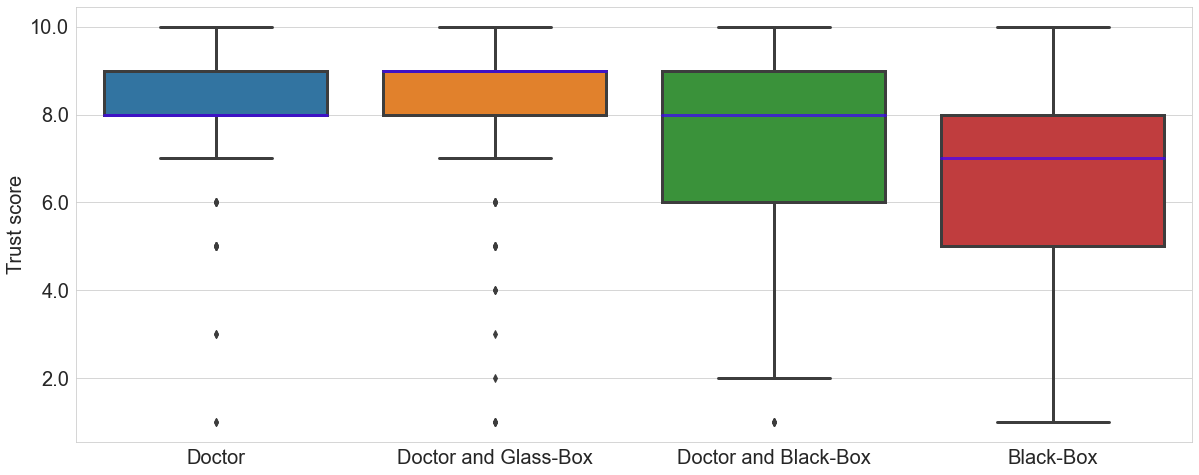

In [27]:
import seaborn as sns
import matplotlib.pylab as plt

sns_box_df = pd.melt(raw_data[[health,dr, dr_gb, dr_bb, bb]], id_vars=[health])


sns.set_style("whitegrid")
p = sns.boxplot(x="variable", y="value", data=sns_box_df, linewidth=line_width, medianprops=medianprops)
p.set_xlabel("")
p.set_ylabel(box_y_label, fontsize=smaller_font)
p.set_yticklabels(p.get_yticks(), size = smaller_font)

[None, None]

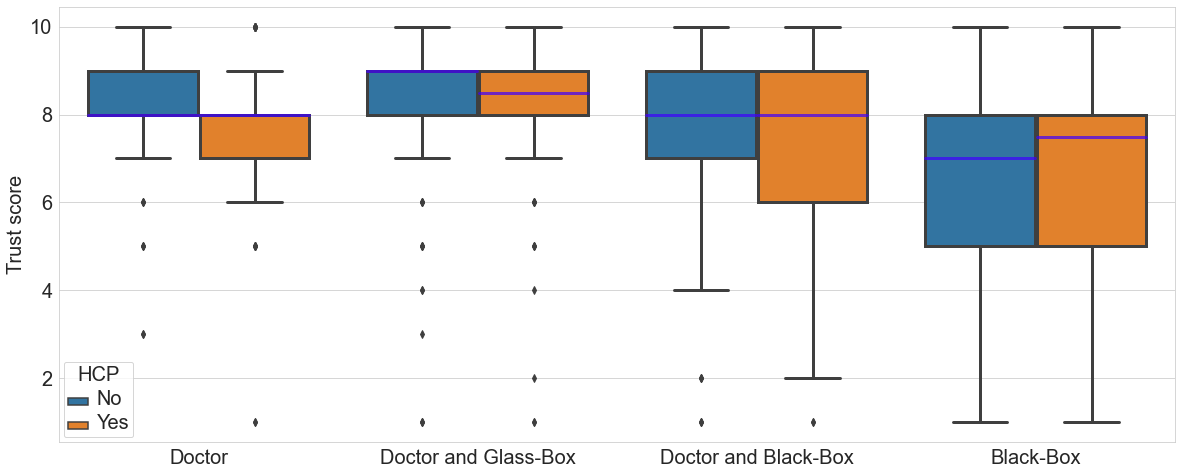

In [29]:
sns.set_style("whitegrid")

sns_box_df = pd.melt(raw_data[[health,dr, dr_gb, dr_bb, bb]], id_vars=[health])

ax = sns.boxplot(x="variable", y="value", data=sns_box_df, hue=health, linewidth=line_width, medianprops=medianprops)
ax.set_xlabel("")
ax.get_legend().set_title('HCP')
ax.set_ylabel(box_y_label, fontsize=smaller_font)
plt.setp(ax.get_legend().get_texts(), fontsize=smaller_font)
plt.setp(ax.get_legend().get_title(), fontsize=smaller_font)

[None, None]

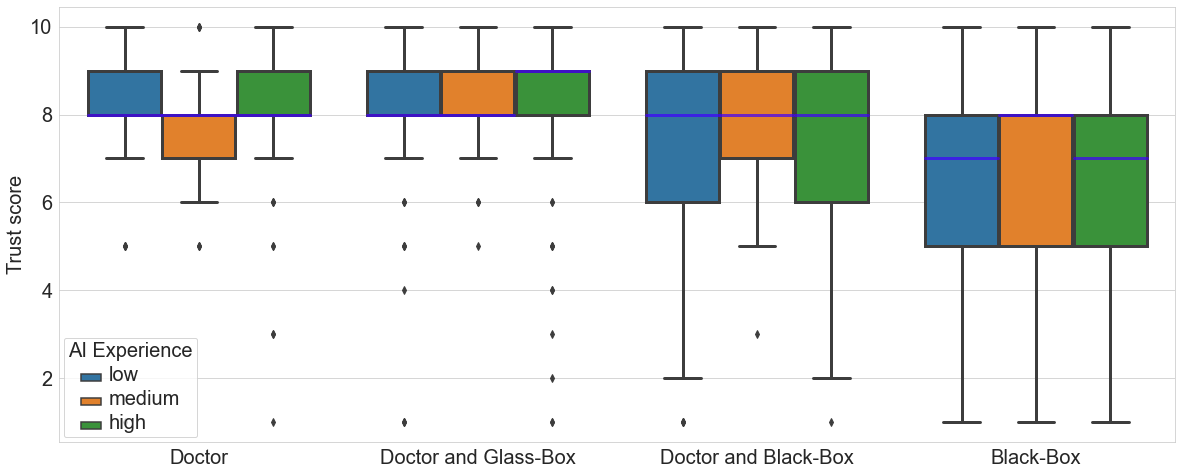

In [30]:
sns_box_df = pd.melt(raw_data[[ai_binned,dr, dr_gb, dr_bb, bb]], id_vars=[ai_binned])

ax = sns.boxplot(x="variable", y="value", data=sns_box_df, hue=ai_binned, linewidth=line_width, medianprops=medianprops)
ax.set_xlabel("")
ax.get_legend().set_title('AI Experience')
ax.set_ylabel(box_y_label, fontsize=smaller_font)
plt.setp(ax.get_legend().get_texts(), fontsize=smaller_font)
plt.setp(ax.get_legend().get_title(), fontsize=smaller_font)


[None, None]

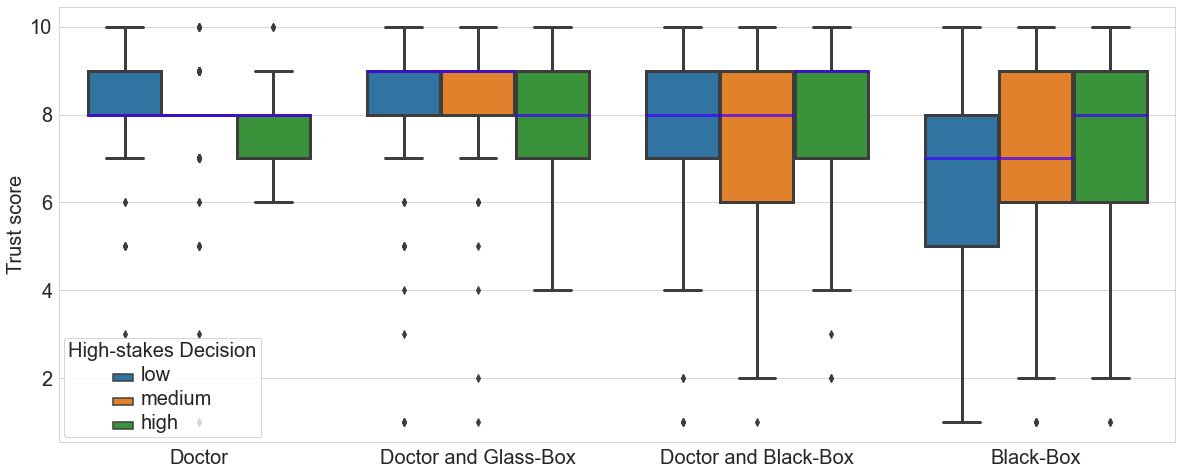

In [31]:
sns_box_df = pd.melt(raw_data[[highstakes_binned,dr, dr_gb, dr_bb, bb]], id_vars=[highstakes_binned])

ax = sns.boxplot(x="variable", y="value", data=sns_box_df, hue=highstakes_binned, linewidth=line_width, medianprops=medianprops)
ax.set_xlabel("")
plt.legend(loc='lower left')
ax.get_legend().set_title('High-stakes Decision')
ax.set_ylabel(box_y_label, fontsize=smaller_font)
plt.setp(ax.get_legend().get_texts(), fontsize=smaller_font)
plt.setp(ax.get_legend().get_title(), fontsize=smaller_font)

    # Trust Ranking per answer

This ranks each answers from 1-4 no matter how much the trust was, 1 highest ranking, 4 lowest ranking

In [4]:
df = pd.DataFrame(data={
    'scen1': [10, 3, 7],
    'scen3': [5, 2, 1],
    'scen4': [8, 2, 2],
    'scen5': [6, 10, 4],
})
df

,scen1,scen3,scen4,scen5
0,10,5,8,6
1,3,2,2,10
2,7,1,2,4


In [5]:
df.rank(axis=1, method='min')

,scen1,scen3,scen4,scen5
0,4.0,1.0,3.0,2.0
1,3.0,1.0,1.0,4.0
2,4.0,1.0,2.0,3.0


In [6]:
df.rank(method='min')

,scen1,scen3,scen4,scen5
0,3.0,3.0,3.0,2.0
1,1.0,2.0,1.0,3.0
2,2.0,1.0,1.0,1.0


In [7]:
ranked_df = raw_data[[dr, dr_gb, dr_bb, bb]].rank(axis=1, method='average').astype(int)
ranked_df

,Dr,Dr & GB,Dr & BB,BB
0,3,3,2,1
1,2,4,2,1
2,2,1,2,4
3,4,3,2,1
4,3,4,2,1
...,...,...,...,...
273,2,2,4,1
274,2,4,2,2
275,1,3,1,3
276,3,4,1,1


In [8]:
total_no = ranked_df.shape[0]
value_c = ranked_df.apply(pd.Series.value_counts)
value_c = value_c.apply(lambda x: (x/total_no)*100)


<AxesSubplot:title={'center':'Overall Ranking'}, xlabel='% of answers', ylabel='Rank (1 lowest, 4 highest)'>

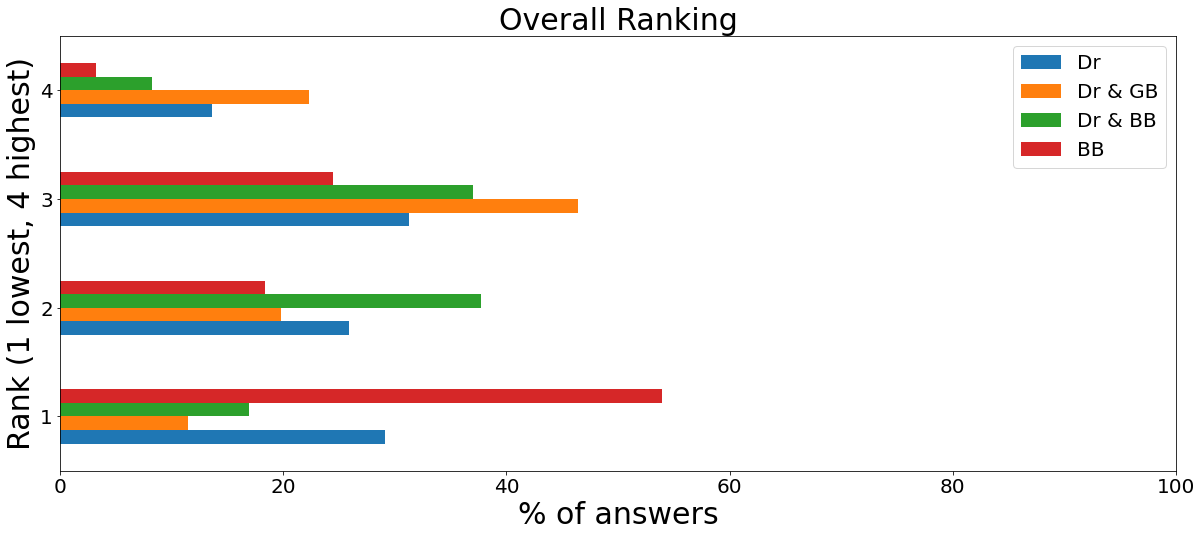

In [17]:
import matplotlib.pyplot as plt
fontsize=30

plt.close("all")
ax = value_c.plot.barh()
plt.title('Overall Ranking', fontsize=fontsize)
plt.ylabel('Rank (1 lowest, 4 highest)', fontsize=fontsize)
plt.xlabel('% of answers', fontsize=fontsize)
plt.xticks(fontsize=fontsize*2/3, rotation=0)
plt.yticks(fontsize=fontsize*2/3)
plt.legend(fontsize=fontsize*2/3)
ax.set_xlim(0, 100)

<AxesSubplot:>

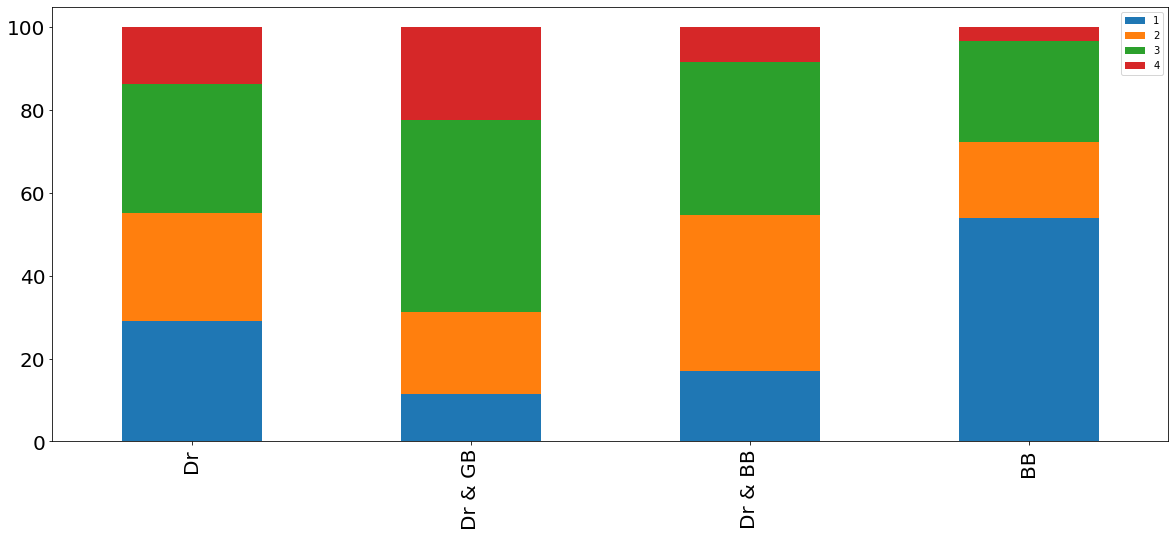

In [21]:
value_c.T.plot.bar(stacked=True)

### Demographics

In [12]:
def sub_frame_for(column, value):
    indices = raw_data[column].loc[lambda x: x == value].index
    return ranked_df.iloc[indices]


def ranking_for(column, value):
    ranking = sub_frame_for(column, value)
    number_of_answers = ranking.shape[0]
    ranking = ranking.apply(pd.Series.value_counts)
    return ranking.apply(lambda x: (x/number_of_answers)*100)


def bar_chart_for(column, value, title, axes):
    ranking = ranking_for(column, value)
    ax = ranking.plot.barh(title=title, ax=axes)
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('% of answers', fontsize=fontsize)
    ax.set_ylabel('Rank (1 lowest, 4 highest)', fontsize=fontsize)
    ax.legend(fontsize=fontsize*2/3)
    ax.set_xlim(0, 100)

def bar_stacked_for(column, value, title, axes, stacked=True):
    ranking = ranking_for(column, value)
    ax = ranking.T.plot.bar(stacked=stacked, title=title, ax=axes, legend=0)
    ax.set_title(title, fontsize=fontsize*2/3)
    if not stacked:
        ax.set_ylim(0, 70)

NameError: name 'ranked_df' is not defined

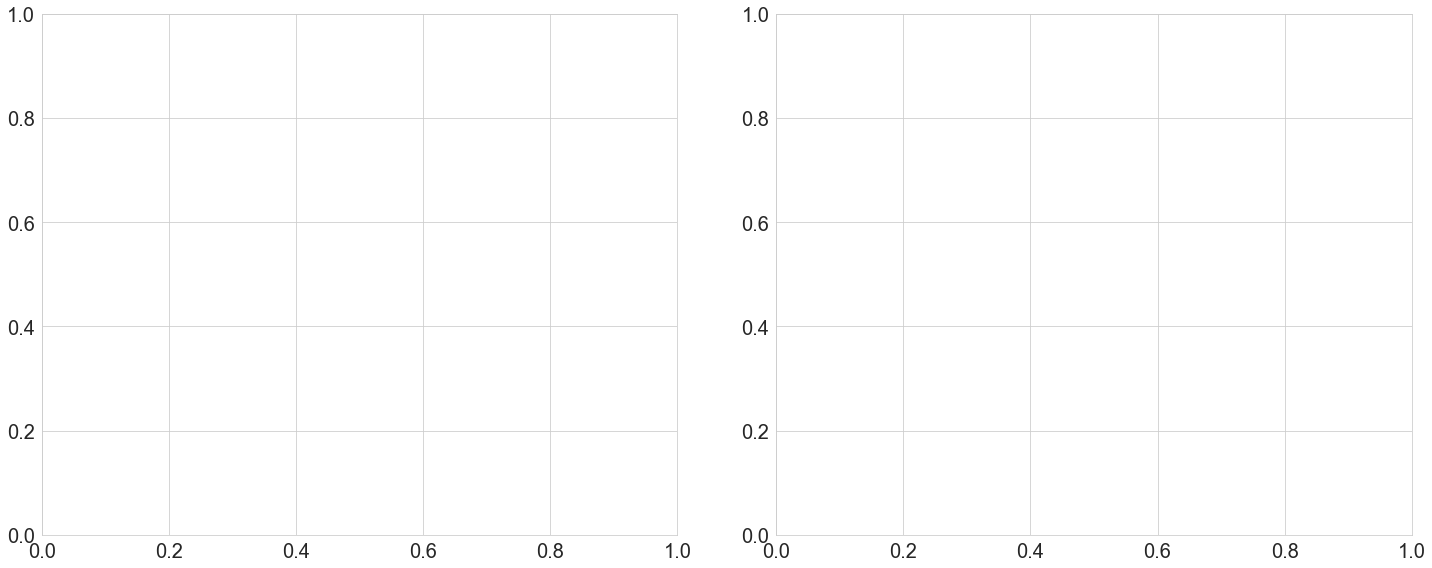

In [13]:
import matplotlib.pyplot as plt
plt.close("all")
plt.rc('xtick', labelsize=fontsize*2/3)
plt.rc('ytick', labelsize=fontsize*2/3)
plt.rcParams["figure.figsize"] = [20, 8]
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(h_pad=5, w_pad=5)

no_HCP = ranking_for(health, 'No')
HCP = ranking_for(health, 'Yes')

bar_chart_for(health, 'No', "Don\'t work in healthcare", axes[0])
bar_chart_for(health, 'Yes', 'Work in healthcare', axes[1])

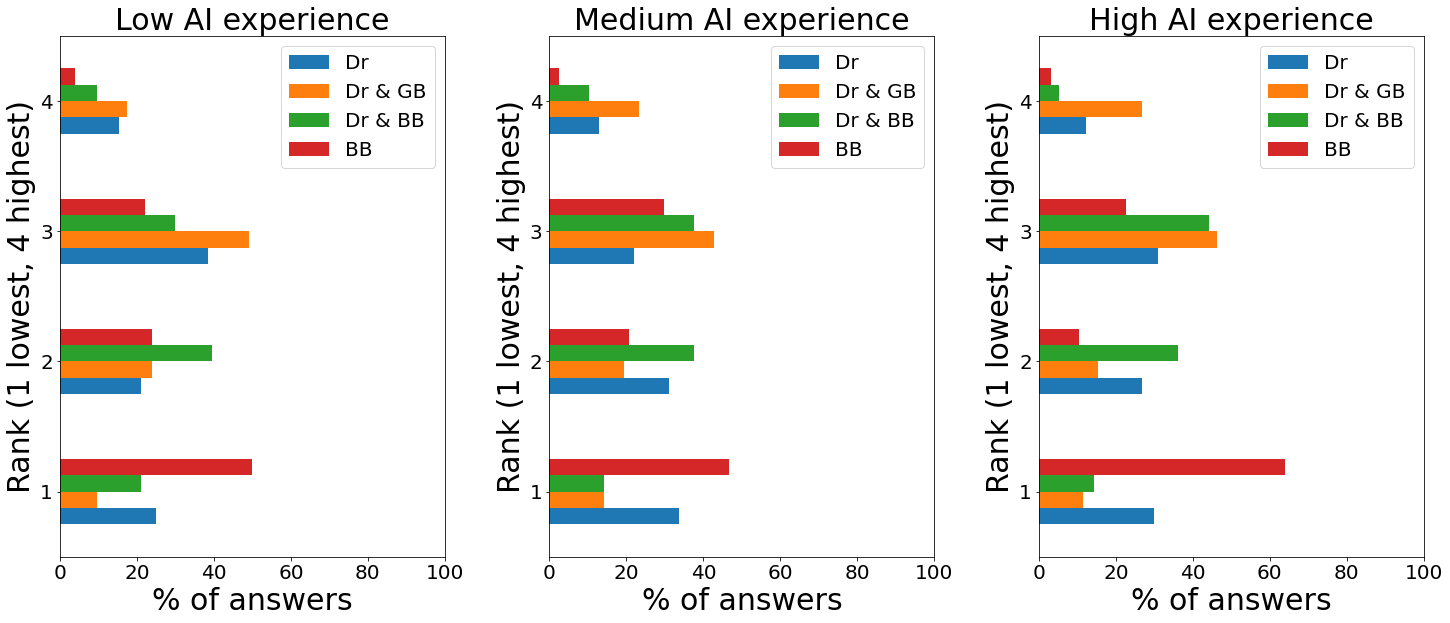

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(h_pad=5, w_pad=5)
bar_chart_for(ai_binned, 0, 'Low AI experience', axes[0])
bar_chart_for(ai_binned, 1, 'Medium AI experience', axes[1])
bar_chart_for(ai_binned, 2, 'High AI experience', axes[2])

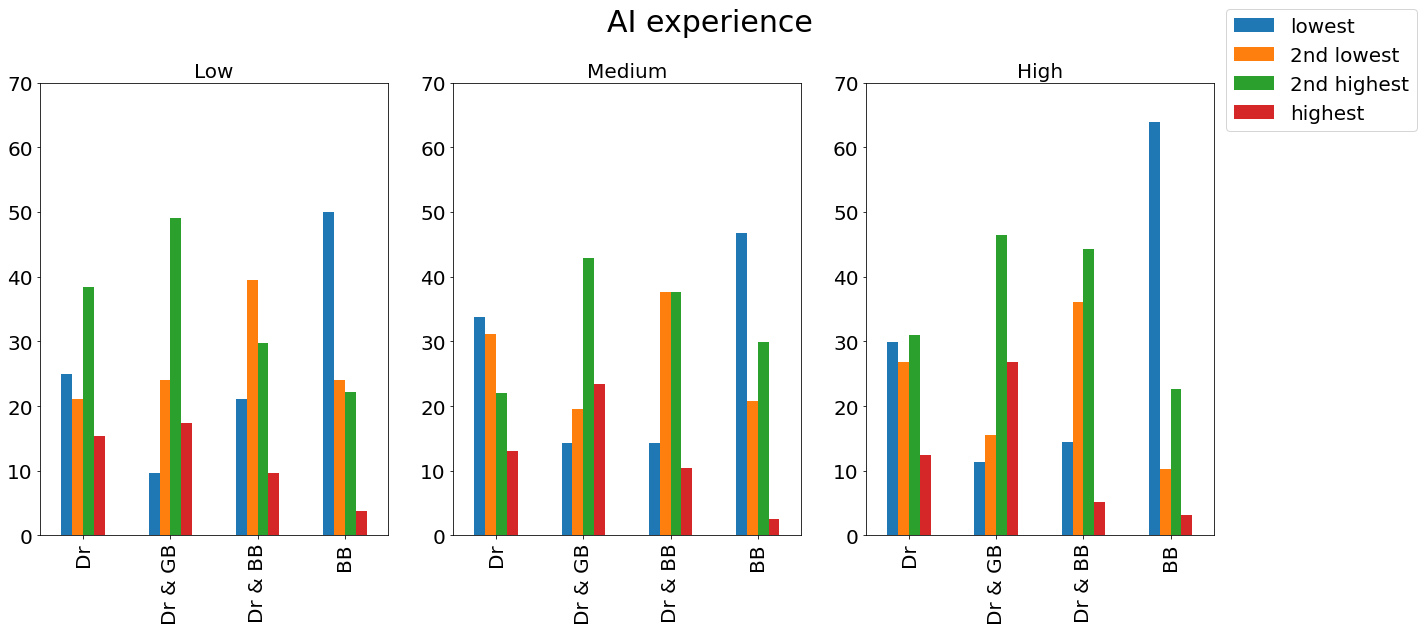

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(h_pad=2, w_pad=2)
fig.suptitle('AI experience', fontsize= fontsize)

bar_stacked_for(ai_binned, 0, 'Low', axes[0])
bar_stacked_for(ai_binned, 1, 'Medium', axes[1])
bar_stacked_for(ai_binned, 2, 'High', axes[2])

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ['lowest', '2nd lowest', '2nd highest', 'highest'], loc='upper right', fontsize=fontsize*2/3)
fig.subplots_adjust(top=0.85, right=0.85)

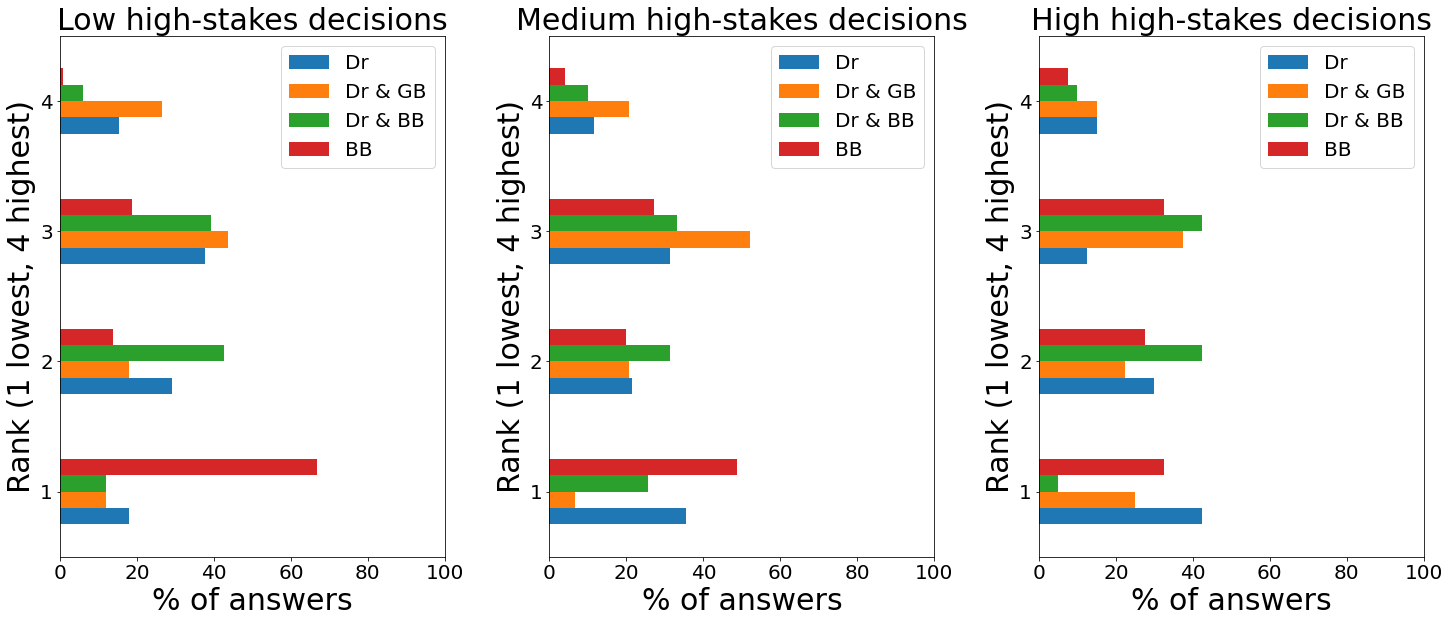

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(h_pad=5, w_pad=5)
bar_chart_for(highstakes_binned, 0, 'Low high-stakes decisions', axes[0])
bar_chart_for(highstakes_binned, 1, 'Medium high-stakes decisions', axes[1])
bar_chart_for(highstakes_binned, 2, 'High high-stakes decisions', axes[2])


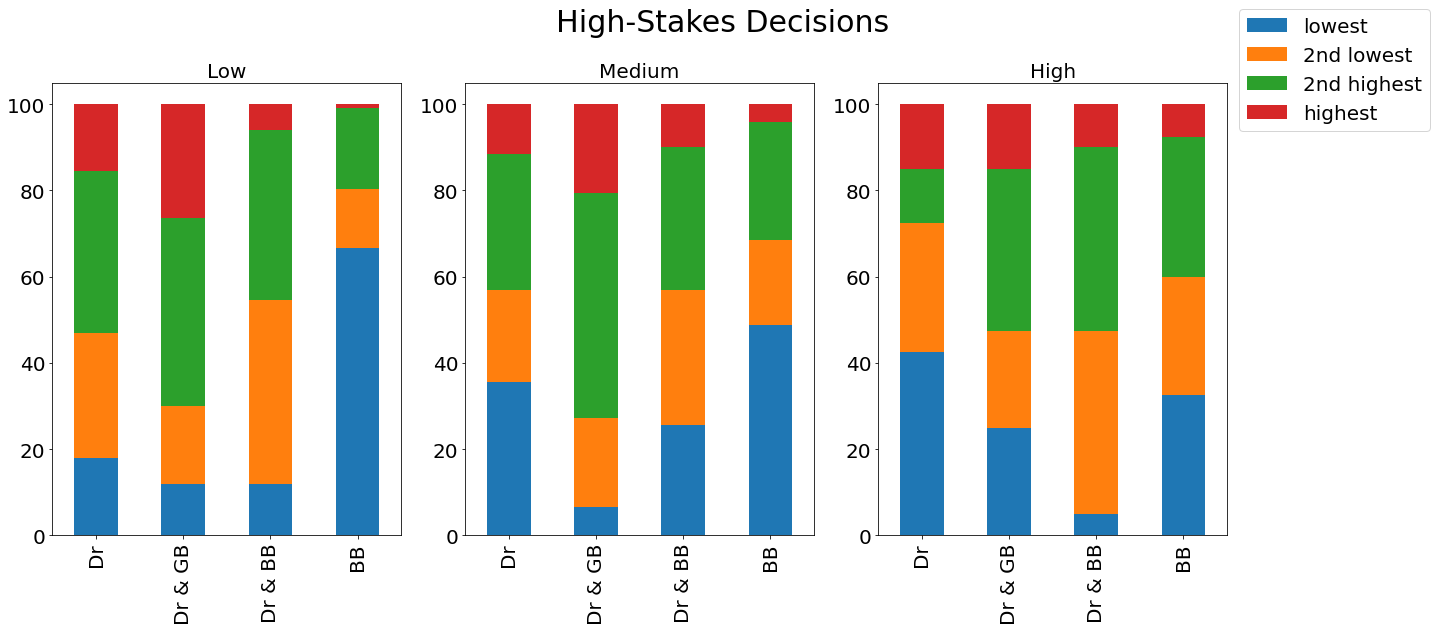

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(h_pad=2, w_pad=2)
fig.suptitle('High-Stakes Decisions', fontsize= fontsize)

bar_stacked_for(highstakes_binned, 0, 'Low', axes[0])
bar_stacked_for(highstakes_binned, 1, 'Medium', axes[1])
bar_stacked_for(highstakes_binned, 2, 'High', axes[2])

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ['lowest', '2nd lowest', '2nd highest', 'highest'], loc='upper right', fontsize=fontsize*2/3)
fig.subplots_adjust(top=0.85, right=0.85)

### Ties

In [16]:
unique_ranking = ranked_df.nunique(axis=1)
unique_ranking.value_counts()

2    115
3    105
4     49
1      9
dtype: int64